##Task 4: Predicting Insurance Claim Amounts

##Objective
To predict medical insurance claim charges based on a person's health and demographic profile using regression.

##Dataset Information
- Dataset Name: Medical Cost Personal Dataset
- Source:Kaggle
- Target Variable:`charges`
- Features:Age, Sex, BMI, Children, Smoker, Region

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
import numpy as np

In [8]:
df = pd.read_csv(r'D:\pythin\insurance.csv')  
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Dataset Overview

In [9]:
print("Shape:", df.shape)

Shape: (1338, 7)


In [10]:
print("Columns:", df.columns.tolist())

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [13]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


##Data Cleaning 
##Check for the missing values 
- No missing values in the dataset.
- Categorical variables (`sex`, `smoker`, `region`) were encoded using One-Hot Encoding.
- Final dataset was numerical and ready for model training.

In [14]:
print(df.isnull().sum())  

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


##Encode the categorical features

In [15]:
df = pd.get_dummies(df, drop_first=True)

##EDA - Visualize Relationships 
- Visualized the relationship between `charges` and key variables like `bmi`, `age`, and `smoker`.
- Found strong positive correlation between charges and both smoking status and BMI.
- Smokers tend to have significantly higher charges.

<Axes: xlabel='bmi', ylabel='charges'>

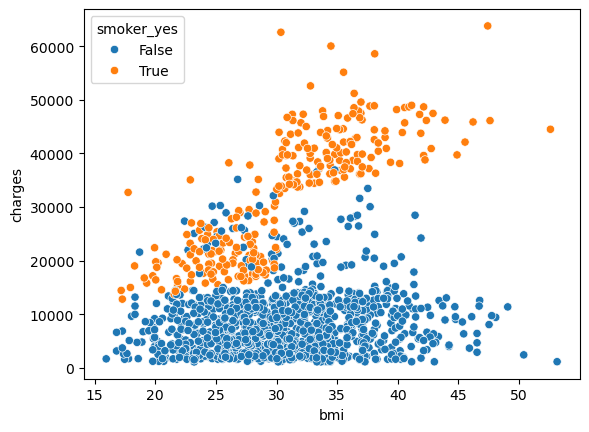

In [16]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker_yes')

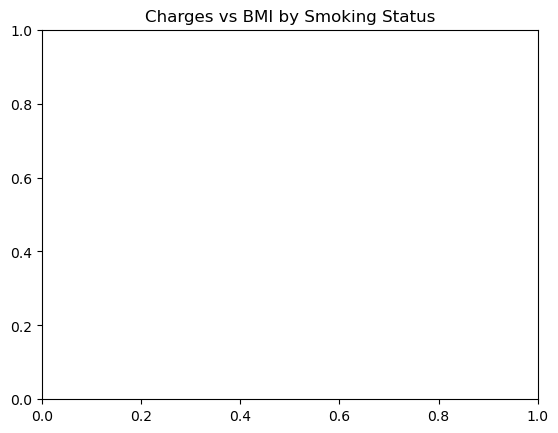

In [17]:
plt.title("Charges vs BMI by Smoking Status")
plt.show()

<Axes: xlabel='age', ylabel='charges'>

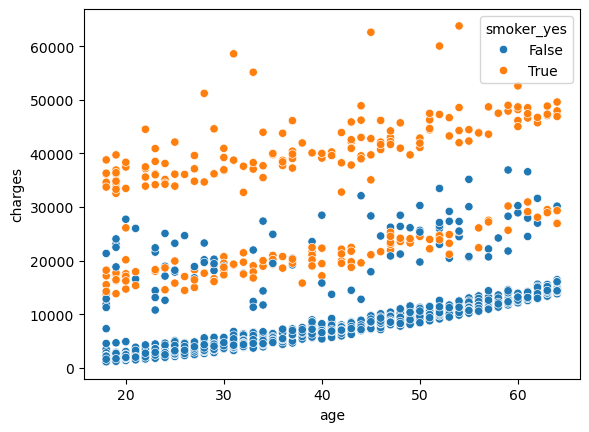

In [18]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker_yes')

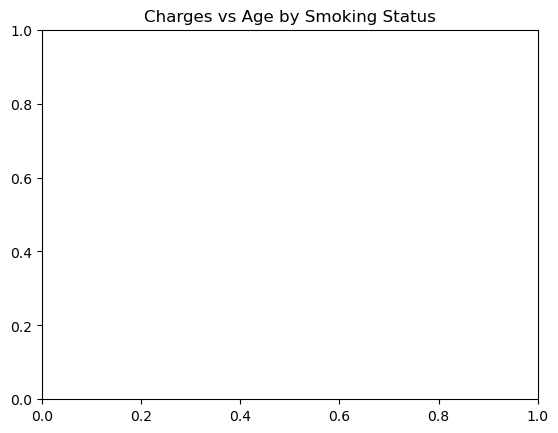

In [19]:
plt.title("Charges vs Age by Smoking Status")
plt.show()


<Axes: xlabel='smoker_yes', ylabel='charges'>

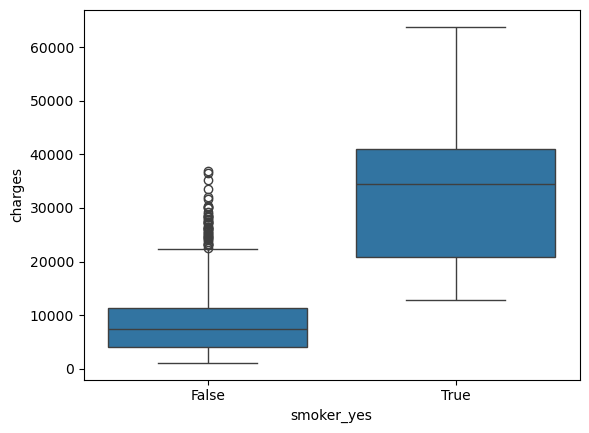

In [20]:
sns.boxplot(data=df, x='smoker_yes', y='charges')

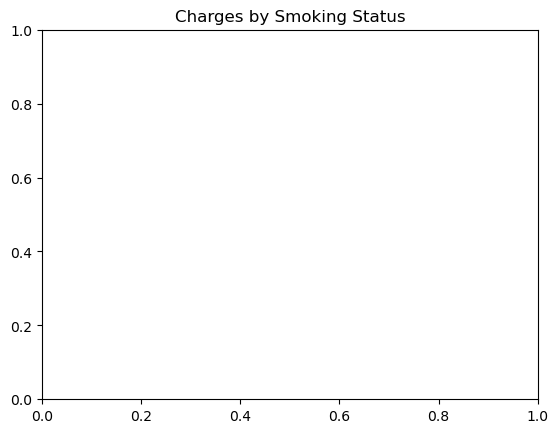

In [21]:
plt.title("Charges by Smoking Status")
plt.show()

##Train the linear regression model to predict charges
- Model Used: Linear Regression
- Train/Test Split:80/20 using `train_test_split`
- Library:scikit-learn

In [22]:
X = df.drop("charges", axis=1)

In [23]:
y = df["charges"]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

##Evaluation Metrics
- MAE (Mean Absolute Error):Measured average prediction error in currency units.
- RMSE (Root Mean Squared Error): Highlighted the magnitude of error.
- These metrics help in evaluating how close predicted charges are to the actual values.

In [28]:
mae = mean_absolute_error(y_test, y_pred)

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [30]:
print("MAE:", mae)

MAE: 4181.194473753649


In [31]:
print("RMSE:", rmse)

RMSE: 5796.284659276272


##Conclusion
##The model predicts insurance charges with acceptable error margins.
##Smoking and BMI are key predictors of high insurance charges.
##Results and Insights
- Linear Regression showed that smoking and BMI have a high impact on insurance charges.
- RMSE and MAE were reasonable for a linear model on this dataset.
- Model performance can be enhanced with feature scaling, polynomial features, or switching to models like Random Forest or XGBoost.